In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

In [2]:
df = pd.read_csv('flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

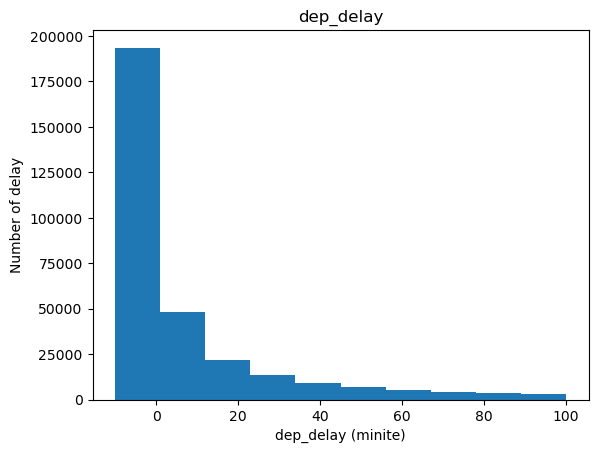

In [4]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df['dep_delay'], range=(-10,100));
plt.xlabel('dep_delay (minite)')
plt.ylabel('Number of delay')
plt.title('dep_delay')
plt.show()

In [5]:
print(n)
print(bins)

[193511.  48354.  21539.  13404.   9150.   6762.   5389.   4144.   3359.
   2985.]
[-10.   1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]


In [6]:
avg_by_name = df.groupby(['name'], as_index=False).agg({'dep_delay': 'mean'}).round(2)
avg_by_name

,name,dep_delay
0,AirTran Airways Corporation,18.73
1,Alaska Airlines Inc.,5.80
2,American Airlines Inc.,8.59
3,Delta Air Lines Inc.,9.26
4,Endeavor Air Inc.,16.73
5,Envoy Air,10.55
6,ExpressJet Airlines Inc.,19.96
7,Frontier Airlines Inc.,20.22
8,Hawaiian Airlines Inc.,4.90
9,JetBlue Airways,13.02


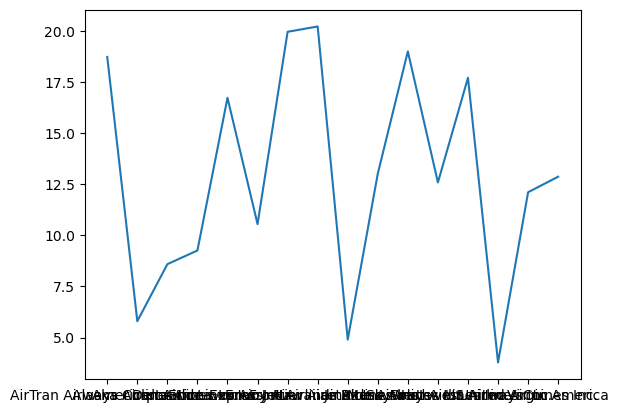

In [10]:
fig, ax1 = plt.subplots()
ax1.plot(avg_by_name['name'], avg_by_name['dep_delay']);

<BarContainer object of 16 artists>

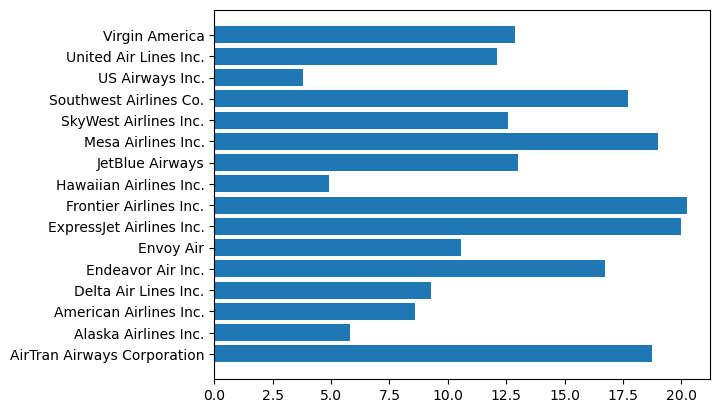

In [11]:
fig, ax1 = plt.subplots()
ax1.barh(avg_by_name['name'], avg_by_name['dep_delay'])

In [7]:
avg_by_name1 = df.groupby(['name']).agg({'dep_delay': 'mean', 
                          'arr_delay': 'mean'})
avg_by_name1

,dep_delay,arr_delay
name,,
AirTran Airways Corporation,18.726075,20.115906
Alaska Airlines Inc.,5.804775,-9.930889
American Airlines Inc.,8.586016,0.364291
Delta Air Lines Inc.,9.264505,1.644341
Endeavor Air Inc.,16.725769,7.379669
Envoy Air,10.552041,10.774733
ExpressJet Airlines Inc.,19.955390,15.796431
Frontier Airlines Inc.,20.215543,21.920705
Hawaiian Airlines Inc.,4.900585,-6.915205


<Axes: ylabel='name'>

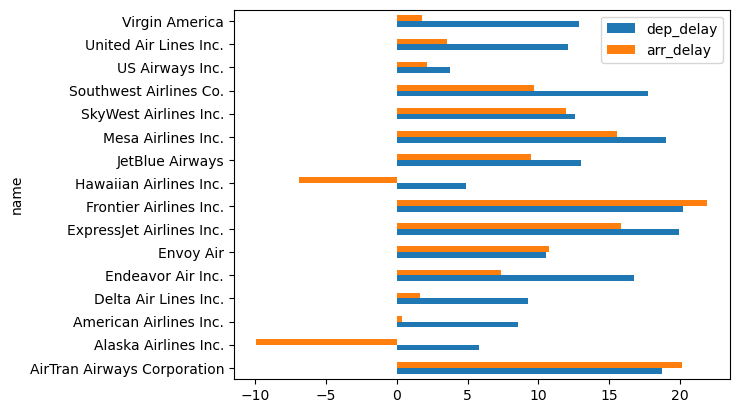

In [8]:
avg_by_name1.plot(kind='barh')

In [29]:
import seaborn as sns
sns.set_style('darkgrid')

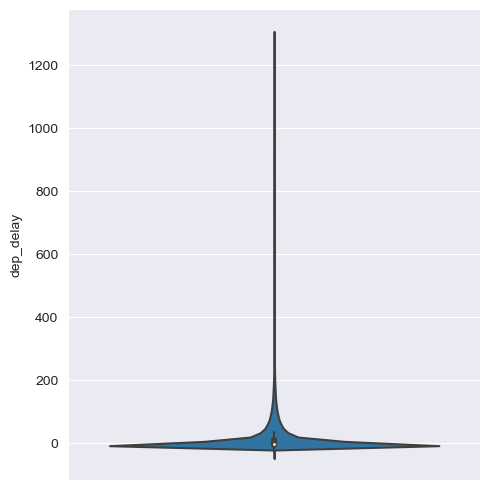

In [36]:
sns.catplot(data=df, y='dep_delay', kind='violin');

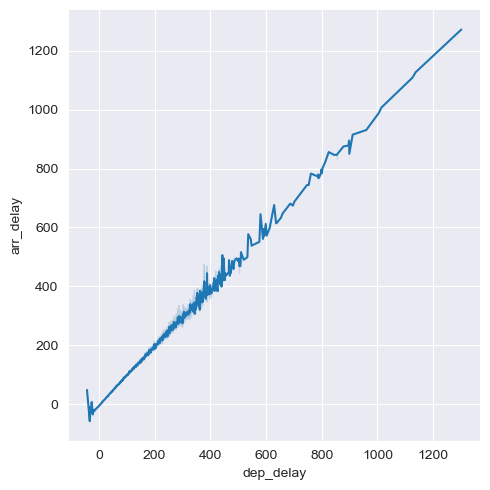

In [30]:
sns.relplot(data=df, x='dep_delay', y='arr_delay', kind='line');

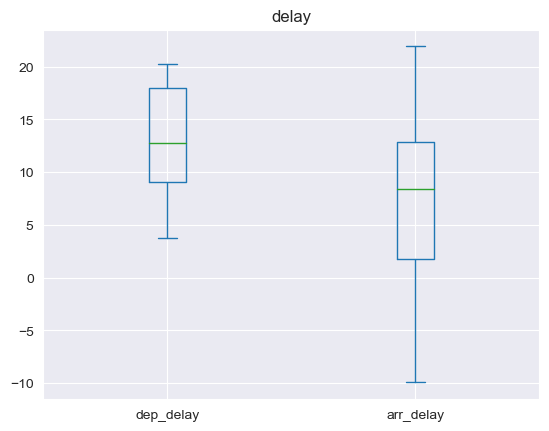

In [50]:
avg_by_year.plot(kind='box',  title='delay');

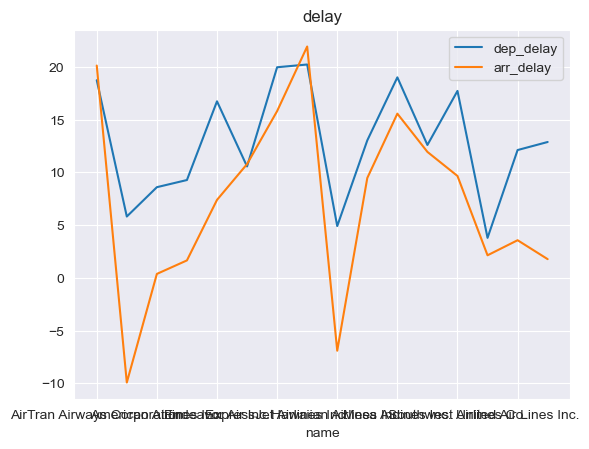

In [53]:
avg_by_name1.plot(kind='line',  title='delay');

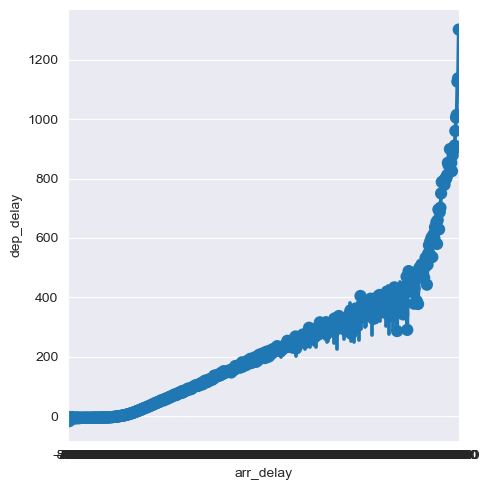

In [43]:
sns.catplot(data=df, 
            y='dep_delay', 
            x='arr_delay',
            kind='point');

In [52]:
avg_by_time = df.groupby(['dep_time'], as_index=False).agg({'dep_delay': 'mean'}).round(2)
avg_by_time

,dep_time,dep_delay
0,1.0,78.84
1,2.0,97.26
2,3.0,67.62
3,4.0,62.27
4,5.0,78.24
...,...,...
1313,2356.0,44.43
1314,2357.0,46.07
1315,2358.0,33.39
1316,2359.0,48.98


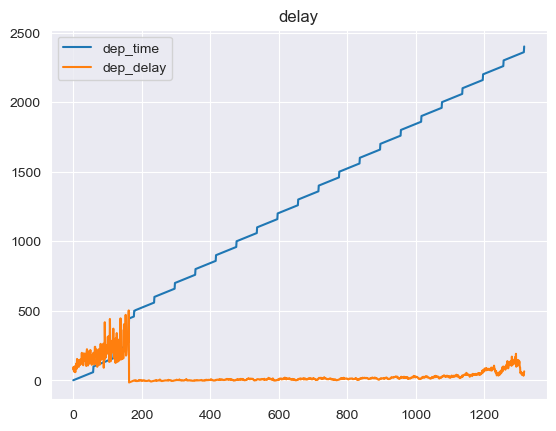

In [54]:
avg_by_time.plot(kind='line',  title='delay');